# Machine Learning 1 Competition Sheet
Marco Knipfer

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from joblib import dump, load
from sklearn.decomposition import PCA

Heavily inspred by https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [2]:
filenameX = 'trainX.dat'
filenamet = 'traint.dat'
dfx = pd.read_csv(filenameX, sep = '\t', header = None)
dft = pd.read_csv(filenamet, sep = '\t', header = None)
dfx['y'] = dft[0]

In [3]:
dfx.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,y
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,2.565333,20.856000,2.520000,2.869333,3233.025333,2.054667,3.357333,2.993333,2.669333,1.154667,...,2.358667,35.317333,2.658667,1.921333,1.409333,2.900000,1.148000,1.401333,1.033333,0.706667
std,1.254258,11.958453,1.083435,2.741462,2813.435483,1.542785,1.205370,1.106460,0.693278,0.493020,...,1.047929,11.467052,0.718457,0.537460,0.574648,0.649021,0.355337,0.490495,0.179625,0.455594
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.000000,1.000000,1356.500000,1.000000,3.000000,2.000000,2.000000,1.000000,...,1.000000,26.250000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,18.000000,2.000000,2.000000,2295.500000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.000000,3.000000,3928.000000,3.000000,4.000000,4.000000,3.000000,1.000000,...,3.000000,41.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000
max,4.000000,60.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,...,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [4]:
dfx.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,y
0,1,24,0,2,4110,1,5,3,3,1,...,4,23,1,1,2,3,2,1,1,0
1,2,9,2,2,959,1,3,1,2,1,...,3,29,1,2,1,3,1,1,1,0
2,4,6,2,0,672,1,1,1,2,1,...,1,54,3,2,1,1,1,2,1,1
3,1,12,4,0,4843,1,5,3,3,2,...,2,43,3,1,2,3,1,2,1,0
4,1,24,4,1,2957,1,5,4,3,1,...,2,63,3,2,2,3,1,2,1,1


# Finding out what are categorical features

In [5]:
dfx.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       'y'],
      dtype='object')

In [6]:
print('shape of data:', dfx.shape)
for col in dfx.columns:
    print('uniques of column', col, ': ', dfx[col].unique().shape[0])

shape of data: (750, 21)
uniques of column 0 :  4
uniques of column 1 :  31
uniques of column 2 :  5
uniques of column 3 :  10
uniques of column 4 :  706
uniques of column 5 :  5
uniques of column 6 :  5
uniques of column 7 :  4
uniques of column 8 :  4
uniques of column 9 :  3
uniques of column 10 :  4
uniques of column 11 :  4
uniques of column 12 :  52
uniques of column 13 :  3
uniques of column 14 :  3
uniques of column 15 :  4
uniques of column 16 :  4
uniques of column 17 :  2
uniques of column 18 :  2
uniques of column 19 :  2
uniques of column y :  2


Thus I conclude that column 4 is not categorical. I am not sure about column 1, but I will just keep it as non-categorical. Maybe column 12 is the age, since the number of different values and the values fit well.

In [17]:
ohc_columns = [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 
               14, 15, 16, 17, 18, 19]

In [22]:
dfx.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,y
0,1,24,0,2,4110,1,5,3,3,1,...,4,23,1,1,2,3,2,1,1,0
1,2,9,2,2,959,1,3,1,2,1,...,3,29,1,2,1,3,1,1,1,0
2,4,6,2,0,672,1,1,1,2,1,...,1,54,3,2,1,1,1,2,1,1
3,1,12,4,0,4843,1,5,3,3,2,...,2,43,3,1,2,3,1,2,1,0
4,1,24,4,1,2957,1,5,4,3,1,...,2,63,3,2,2,3,1,2,1,1


In [21]:
pca = PCA(n_components = 1)
pca.fit(dfx)
#print(pca.explained_variance_ratio_)
print(pca.components_)

[[-1.41392848e-05  2.65573671e-03 -2.13475443e-05  6.57204867e-05
   9.99996434e-01  3.16792013e-05  5.69410322e-07 -1.03384635e-04
   7.46132978e-07 -5.80165146e-06  2.33430351e-06  1.15024785e-04
   2.03309306e-04 -1.85184497e-05  2.26348234e-05  2.46716310e-06
   6.63290787e-05  2.09523106e-06  5.14606454e-05 -7.27326347e-07
  -2.39113308e-05]]


# One-Hot encoding

one-hot-encoding all columns in ohc_columns.

Now we have 101 features. All but 4110 and 23 are one-hot-encoded and either 1 or zero.

In [8]:
dfx_ohc = pd.get_dummies(dfx, columns=ohc_columns)

In [9]:
dfx_ohc.shape

(750, 72)

In [10]:
dfx_ohc.head()

,1,4,12,y,0_1,0_2,0_3,0_4,2_0,2_1,...,16_1,16_2,16_3,16_4,17_1,17_2,18_1,18_2,19_1,19_2
0,24,4110,23,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,0
1,9,959,29,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,6,672,54,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
3,12,4843,43,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,24,2957,63,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


# Visualization

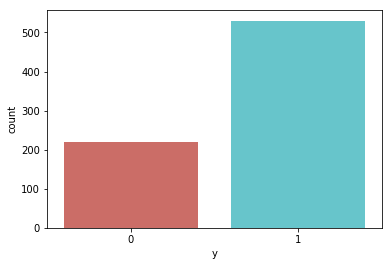

In [11]:
sns.countplot(x='y', data=dfx, palette='hls')

In [12]:
count_total = len(dfx)
count_1 = len(dfx[dfx['y'] == 1])
count_0 = len(dfx[dfx['y'] == 0])
print('1s:', count_1 / count_total, '%')

1s: 0.7066666666666667 %


# Train Test Split, Logistic Regression

In [13]:
train = dfx_ohc.sample(frac = 0.9, random_state = 314)
test = dfx_ohc.drop(train.index)

train.drop('y', axis = 1).to_csv('only_trainX.csv', index = False, sep = '\t')
train['y'].to_csv('only_trainy.csv', index = False, sep = '\t')
test.drop('y', axis = 1).to_csv('only_testX.csv', index = False, sep = '\t')
test['y'].to_csv('only_testy.csv', index = False, sep = '\t')
# not using colums  13, 16, 19, 12, 8, 16
use_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
            14, 15, 16, 17, 18, 19]
#use_cols = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 15,
 #           17, 18]

trainX = train.drop('y', axis = 1)
trainy = train['y']
testX = test.drop('y', axis = 1)
testy = test['y']

In [14]:
logit_model = sm.Logit(trainy,trainX)
logit_fit = logit_model.fit()
print(logit_fit.summary2())

         Current function value: 0.413647
         Iterations: 35
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.316     
Dependent Variable:    y                 AIC:               668.4239  
Date:                  2018-12-26 22:07  BIC:               916.7331  
No. Observations:      675               Log-Likelihood:    -279.21   
Df Model:              54                LL-Null:           -408.45   
Df Residuals:          620               LLR p-value:       1.8200e-28
Converged:             0.0000            Scale:             1.0000    
No. Iterations:        35.0000                                        
----------------------------------------------------------------------
      Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------
1    -0.0282        0.0123 -2.2839 0.0224        -0.0523       -0.0040
4    -0.0002        0.0001 -2.7364 0.00

/home/mknipfer/.local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/mknipfer/.local/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [15]:
logreg = LogisticRegression(C = 1., penalty = "l1", max_iter=500)
logreg.fit(trainX, trainy)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
predy = logreg.predict(testX)
logreg.score(testX, testy)

0.7733333333333333

# Confusion Matrix

In [17]:
cf_matrix = confusion_matrix(testy, predy)
print(cf_matrix)

[[13  9]
 [ 8 45]]


# Classification Report

In [18]:
print(classification_report(testy, predy))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.83      0.85      0.84        53

   micro avg       0.77      0.77      0.77        75
   macro avg       0.73      0.72      0.72        75
weighted avg       0.77      0.77      0.77        75



# Receiver operating characteristic

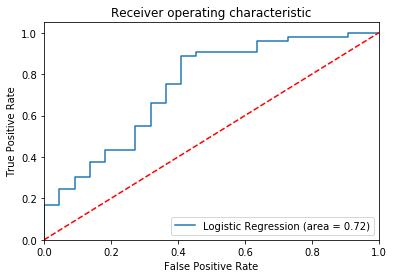

In [19]:
logit_roc_auc = roc_auc_score(testy, logreg.predict(testX))
fpr, tpr, thresholds = roc_curve(testy, logreg.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Threshold, Rates

https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

https://en.wikipedia.org/wiki/Confusion_matrix

Essentially we want few false positives (top right of confusion matrix),
but no zero, because this would mean always predicting 0.

In [20]:
def fd_rate(cf_matrix):
    # FP / (FP + TP)
    return cf_matrix[0][1] / (cf_matrix[0][1] + cf_matrix[0][0])

def tp_rate(cf_matrix):
    # TP / (FP + FN)
    return cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[1][0])

def fo_rate(cf_matrix):
    # FN / (FN + TN)
    return cf_matrix[1][0] / (cf_matrix[1][0] + cf_matrix[1][1])

def specificity_rate(cf_matrix):
    # TN / (FP + TN)
    return cf_matrix[1][1] / (cf_matrix[0][1] + cf_matrix[1][1])

def precision_rate(cf_matrix):
    # TP / (TP + FP)
    return cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[0][1])

def error_rate(cf_matrix):
    # (FP + FN) / ALL
    return (cf_matrix[0][1] + cf_matrix[1][0]) / (cf_matrix[0][0] + cf_matrix[0][1] + cf_matrix[1][0] + cf_matrix[1][1])

In [21]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(testX))
threshold_list = np.linspace(0.65, 0.8, num=20)
for i in threshold_list:
    print ('\n******** For threshold = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(testy.as_matrix().reshape(testy.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    cf_matrix = confusion_matrix(testy.as_matrix().reshape(testy.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('False discovery rate:', fd_rate(cf_matrix))
    print('Precision rate:', precision_rate(cf_matrix))
    print('Error rate:', error_rate(cf_matrix))
    print('True positive rate:', tp_rate(cf_matrix))
    print('False omission rate:', fo_rate(cf_matrix))
    print('Specificity rate:', specificity_rate(cf_matrix))
    print(cf_matrix)
    # seems like 0.73 is a good threshold?


******** For threshold = 0.65 ******
Our testing accuracy is 0.6933333333333334
False discovery rate: 0.36363636363636365
Precision rate: 0.6363636363636364
Error rate: 0.30666666666666664
True positive rate: 0.4827586206896552
False omission rate: 0.2830188679245283
Specificity rate: 0.8260869565217391
[[14  8]
 [15 38]]

******** For threshold = 0.6578947368421053 ******
Our testing accuracy is 0.68
False discovery rate: 0.36363636363636365
Precision rate: 0.6363636363636364
Error rate: 0.32
True positive rate: 0.4666666666666667
False omission rate: 0.3018867924528302
Specificity rate: 0.8222222222222222
[[14  8]
 [16 37]]

******** For threshold = 0.6657894736842106 ******
Our testing accuracy is 0.68
False discovery rate: 0.36363636363636365
Precision rate: 0.6363636363636364
Error rate: 0.32
True positive rate: 0.4666666666666667
False omission rate: 0.3018867924528302
Specificity rate: 0.8222222222222222
[[14  8]
 [16 37]]

******** For threshold = 0.6736842105263158 ******
Our

/home/mknipfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/mknipfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/mknipfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/mknipfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [22]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(testX))
threshold_list = np.linspace(0.4, 0.8, num=70)
fd_rate_array = []
precision_rate_array = []
error_rate_array = []
tp_rate_array = []
fo_rate_array = []
specificity_rate_array = []
for i in threshold_list:
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(testy.as_matrix().reshape(testy.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    cf_matrix = confusion_matrix(testy.as_matrix().reshape(testy.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    fd_rate_array.append(fd_rate(cf_matrix))
    precision_rate_array.append(precision_rate(cf_matrix))
    error_rate_array.append(error_rate(cf_matrix))
    tp_rate_array.append(tp_rate(cf_matrix))
    fo_rate_array.append(fo_rate(cf_matrix))
    specificity_rate_array.append(specificity_rate(cf_matrix))


/home/mknipfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/home/mknipfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/mknipfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/home/mknipfer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'rate')

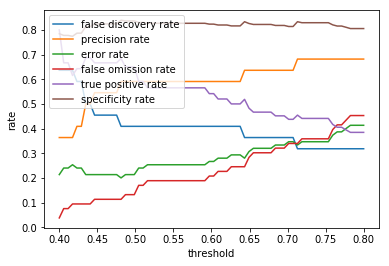

In [23]:
plt.plot(threshold_list, fd_rate_array, label = 'false discovery rate')
plt.plot(threshold_list, precision_rate_array, label = 'precision rate')
plt.plot(threshold_list, error_rate_array, label = 'error rate')
plt.plot(threshold_list, fo_rate_array, label = 'false omission rate')
plt.plot(threshold_list, tp_rate_array, label = 'true positive rate')
plt.plot(threshold_list, specificity_rate_array, label = 'specificity rate')
plt.legend(loc=2)
plt.xlabel('threshold')
plt.ylabel('rate')

# Improvements

# Over-sampling using SMOTE

oversampling only train data

In [24]:
X = dfx_ohc.loc[:, dfx_ohc.columns != 'y']
y = dfx_ohc.loc[:, dfx_ohc.columns == 'y']


os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 0 in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of 1",len(os_data_y[os_data_y['y']==1]))
print("Proportion of 0 data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  954
Number of 0 in oversampled data 477
Number of 1 477
Proportion of 0 data in oversampled data is  0.5
Proportion of 1 data in oversampled data is  0.5


/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


only take use_cols

In [25]:
trainX = os_data_X
trainy = os_data_y
testX = X_test
testy = y_test

In [26]:
logreg_os = LogisticRegression()
logreg_os.fit(trainX, trainy)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = logreg_os.predict(testX)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_os.score(testX, testy)))

Accuracy of logistic regression classifier on test set: 0.80


# Saving models

In [28]:
dump(logreg, 'logreg.joblib')
dump(logreg_os, 'logreg_os.joblib')
dump(use_cols, 'usecols.joblib')
dump(ohc_columns, 'ohc_cols.joblib')

['ohc_cols.joblib']